# Extrovert vs. Introvert Behavior Prediction

In [30]:
# Importing dataset via kaggle

!kaggle datasets download -d rakeshkapilavai/extrovert-vs-introvert-behavior-data

Dataset URL: https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data
License(s): CC-BY-SA-4.0
extrovert-vs-introvert-behavior-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [31]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Extrovert vs. Introvert Behavior Prediction/extrovert-vs-introvert-behavior-data.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Extrovert vs. Introvert Behavior Prediction')
zip_ref.close()

## Explaratory Data Analysis

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [33]:
df = pd.read_csv('personality_dataset.csv')

In [34]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [35]:
df.shape

(2900, 8)

In [36]:
df.size

23200

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time_spent_Alone,2837.0,4.505816,3.479192,0.0,2.0,4.0,8.0,11.0
Social_event_attendance,2838.0,3.963354,2.903827,0.0,2.0,3.0,6.0,10.0
Going_outside,2834.0,3.000000,2.247327,0.0,1.0,3.0,5.0,7.0
Friends_circle_size,2823.0,6.268863,4.289693,0.0,3.0,5.0,10.0,15.0
Post_frequency,2835.0,3.564727,2.926582,0.0,1.0,3.0,6.0,10.0


In [39]:
df.isnull().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [40]:
df.duplicated().sum()

np.int64(388)

In [41]:
df.nunique()

Time_spent_Alone             12
Stage_fear                    2
Social_event_attendance      11
Going_outside                 8
Drained_after_socializing     2
Friends_circle_size          16
Post_frequency               11
Personality                   2
dtype: int64

In [42]:
df['Personality'].value_counts()

Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64

## Data Visualization

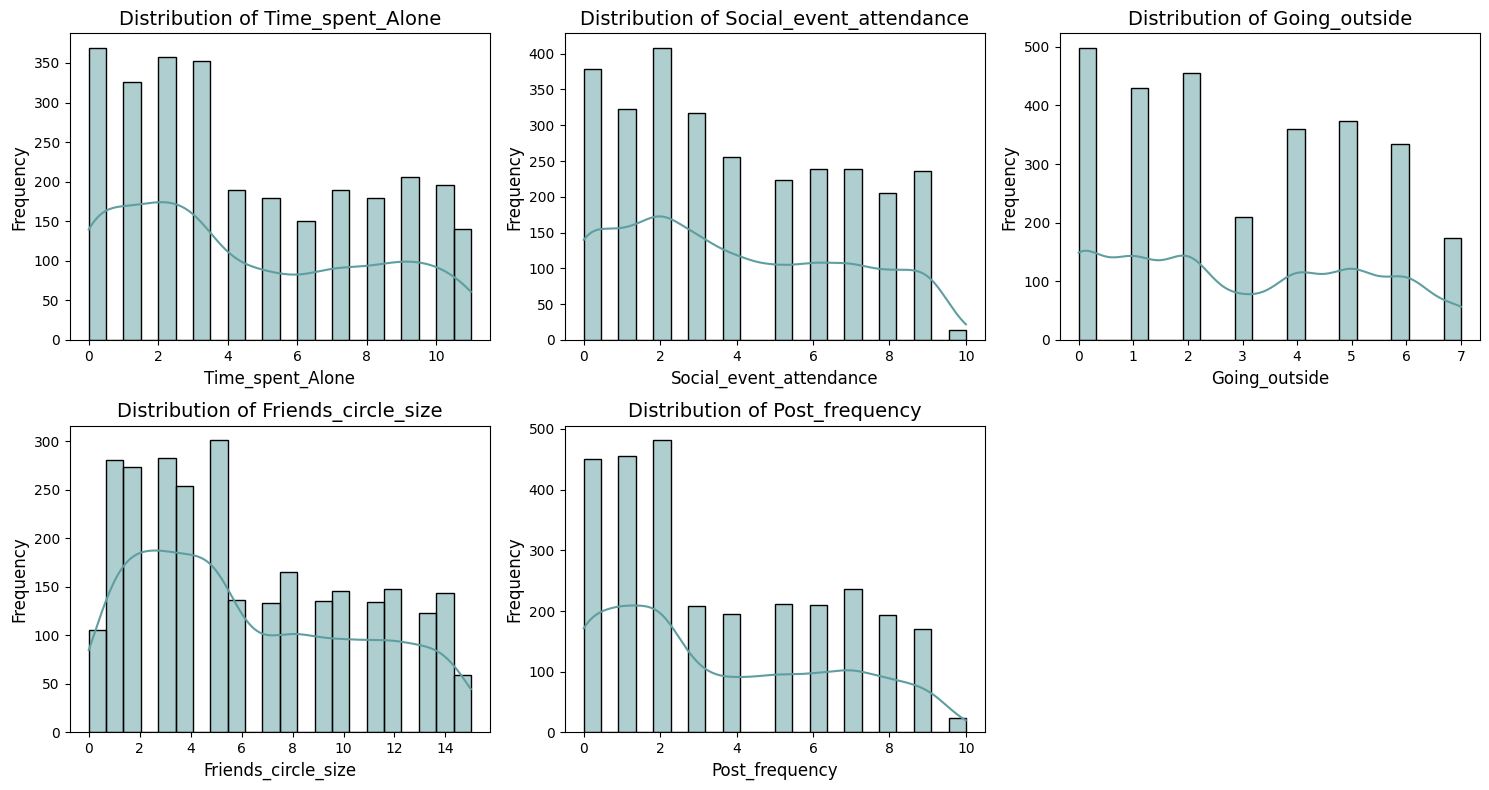

In [43]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    if i < len(axes):  # Ensure we don't exceed the number of axes
        sns.histplot(df[col], bins=22, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel("Frequency", fontsize=12)
        axes[i].set_title(f"Distribution of {col}", fontsize=14)

# Remove any unused axes
if len(axes) > len(numerical_cols):
    for j in range(len(numerical_cols), len(axes)):
        axes[j].remove()

plt.tight_layout()
plt.show()

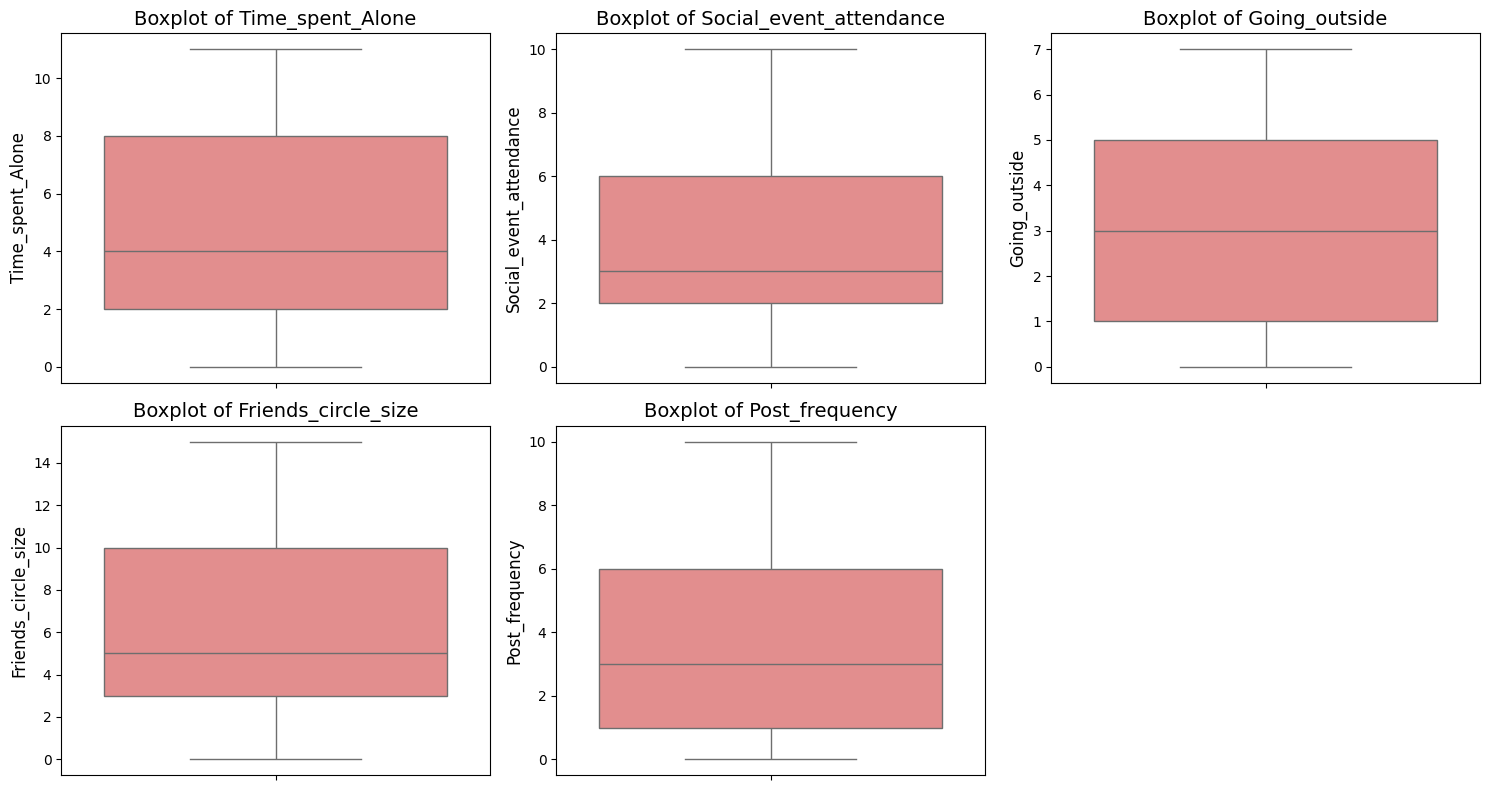

In [44]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

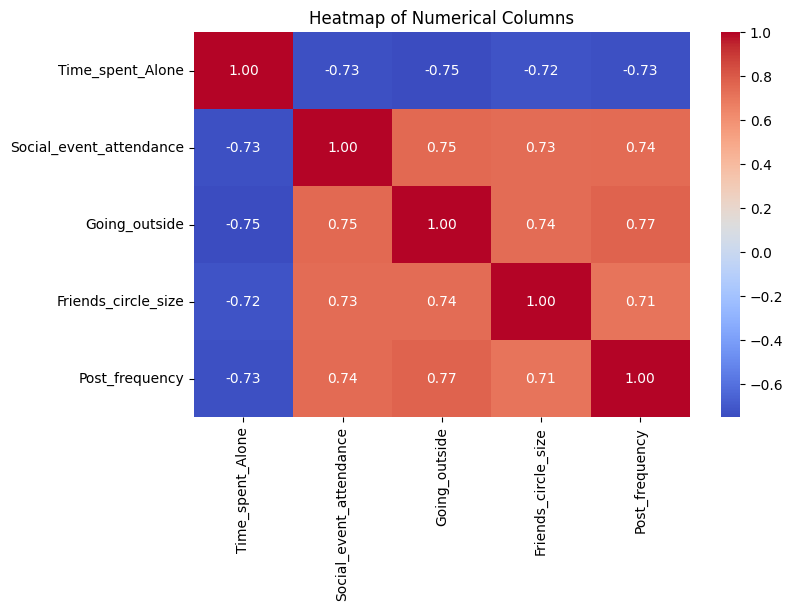

In [45]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(8, 5))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [46]:
# Dropping duplicates

df.drop_duplicates(inplace=True)

In [47]:
# Filling all numerical values with mean and categorical values with mode

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        df[column].fillna(df[column].mean(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

In [48]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':  
        df[col] = encoder.fit_transform(df[col].astype(str).values)

In [49]:
X = df.drop(columns=['Personality'])
y = df['Personality']

In [50]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [51]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [52]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [53]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.9244532803180915, 0.9165009940357853, 0.8906560636182903, 0.9005964214711729, 0.9244532803180915, 0.9324055666003976, 0.8946322067594433, 0.8429423459244533, 0.9324055666003976]


## Model Evalaution

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       282
           1       0.92      0.90      0.91       221

    accuracy                           0.92       503
   macro avg       0.92      0.92      0.92       503
weighted avg       0.92      0.92      0.92       503

Confusion Matrix:
 [[265  17]
 [ 21 200]]


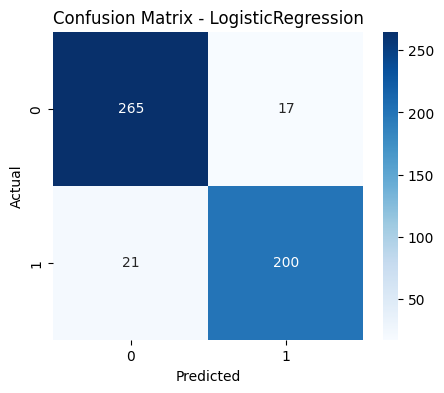

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93       282
           1       0.92      0.89      0.90       221

    accuracy                           0.92       503
   macro avg       0.92      0.91      0.91       503
weighted avg       0.92      0.92      0.92       503

Confusion Matrix:
 [[265  17]
 [ 25 196]]


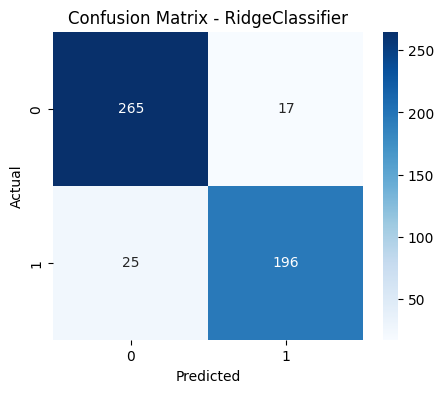

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       282
           1       0.88      0.87      0.88       221

    accuracy                           0.89       503
   macro avg       0.89      0.89      0.89       503
weighted avg       0.89      0.89      0.89       503

Confusion Matrix:
 [[255  27]
 [ 28 193]]


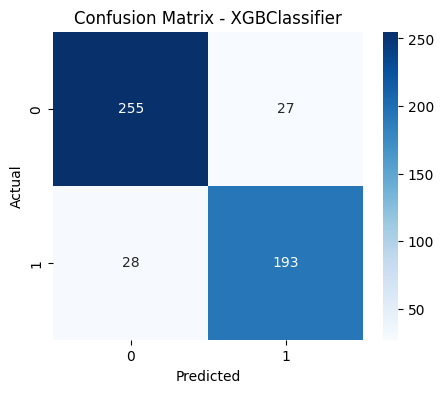

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       282
           1       0.89      0.88      0.88       221

    accuracy                           0.90       503
   macro avg       0.90      0.90      0.90       503
weighted avg       0.90      0.90      0.90       503

Confusion Matrix:
 [[257  25]
 [ 26 195]]


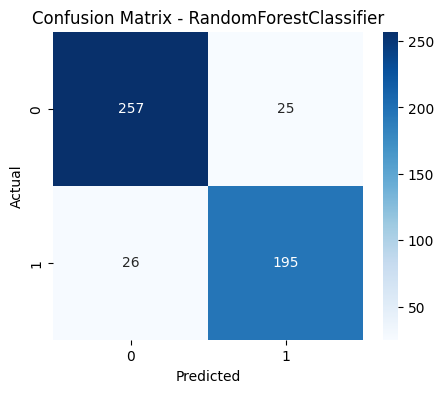

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       282
           1       0.92      0.90      0.91       221

    accuracy                           0.92       503
   macro avg       0.92      0.92      0.92       503
weighted avg       0.92      0.92      0.92       503

Confusion Matrix:
 [[265  17]
 [ 23 198]]


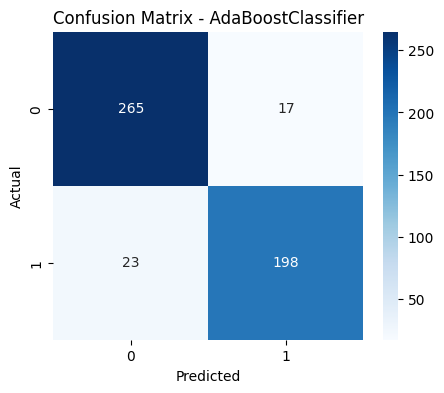

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       282
           1       0.92      0.92      0.92       221

    accuracy                           0.93       503
   macro avg       0.93      0.93      0.93       503
weighted avg       0.93      0.93      0.93       503

Confusion Matrix:
 [[265  17]
 [ 17 204]]


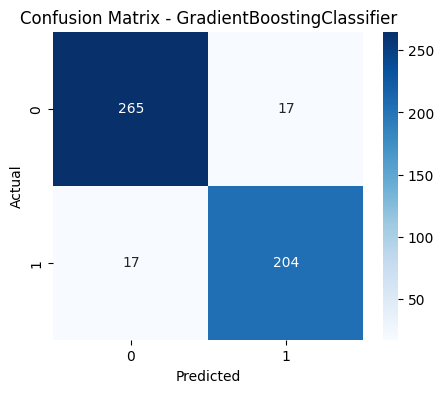

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       282
           1       0.87      0.88      0.87       221

    accuracy                           0.89       503
   macro avg       0.89      0.89      0.89       503
weighted avg       0.89      0.89      0.89       503

Confusion Matrix:
 [[253  29]
 [ 27 194]]


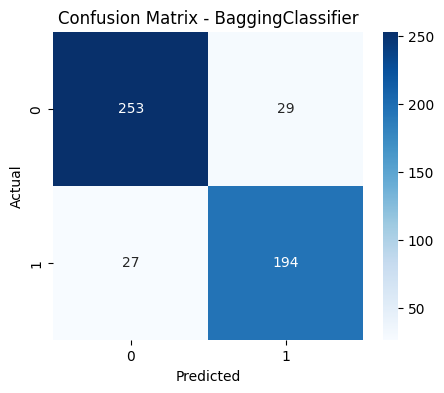

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       282
           1       0.83      0.81      0.82       221

    accuracy                           0.84       503
   macro avg       0.84      0.84      0.84       503
weighted avg       0.84      0.84      0.84       503

Confusion Matrix:
 [[246  36]
 [ 43 178]]


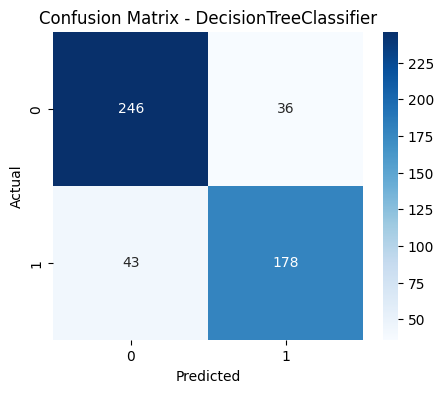

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       282
           1       0.92      0.92      0.92       221

    accuracy                           0.93       503
   macro avg       0.93      0.93      0.93       503
weighted avg       0.93      0.93      0.93       503

Confusion Matrix:
 [[265  17]
 [ 17 204]]


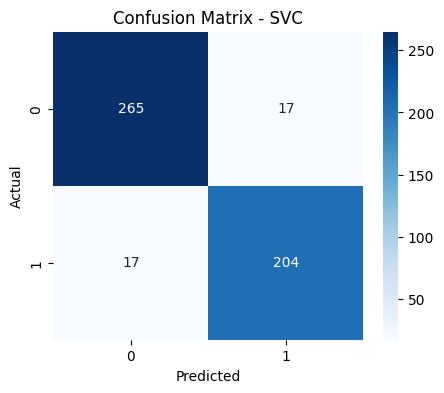

In [54]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()